In [1]:
import torch
import mlflow
from PIL import Image
from torchvision.transforms import ToTensor, Resize
import matplotlib.pyplot as plt

# Visualize predictions

In [2]:
imagePath = 'Sheep_Image.jpg'
rawImage = Image.open(imagePath)
transformedImage = Resize((256,256))(ToTensor()(rawImage))

In [3]:
runId = "0bf055c591c74d3281ea757834566257"
modelUri = f"runs:/{runId}/SavedModels/trainedModel.pth"
model = mlflow.pytorch.load_model(modelUri)

In [4]:
predHeatmaps = model(transformedImage.unsqueeze(0)).detach().numpy()
predHeatmaps.shape

(1, 2, 9, 64, 64)

Text(0.5, 1.0, 'Mouth 2')

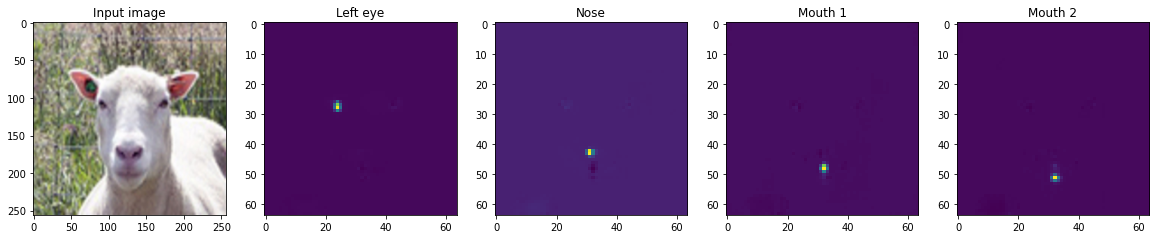

In [5]:
fig, axs = plt.subplots(1,5, figsize=(20,8))
axs[0].imshow(transformedImage.permute(1,2,0))
axs[0].set_title('Input image')
axs[1].imshow(predHeatmaps[0,1,1])
axs[1].set_title('Left eye')
axs[2].imshow(predHeatmaps[0,1,4])
axs[2].set_title('Nose')
axs[3].imshow(predHeatmaps[0,1,7])
axs[3].set_title('Mouth 1')
axs[4].imshow(predHeatmaps[0,1,8])
axs[4].set_title('Mouth 2')